In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%config InlineBackend.figure_format = 'retina'


from sklearn import linear_model
from sklearn import metrics

# Part A

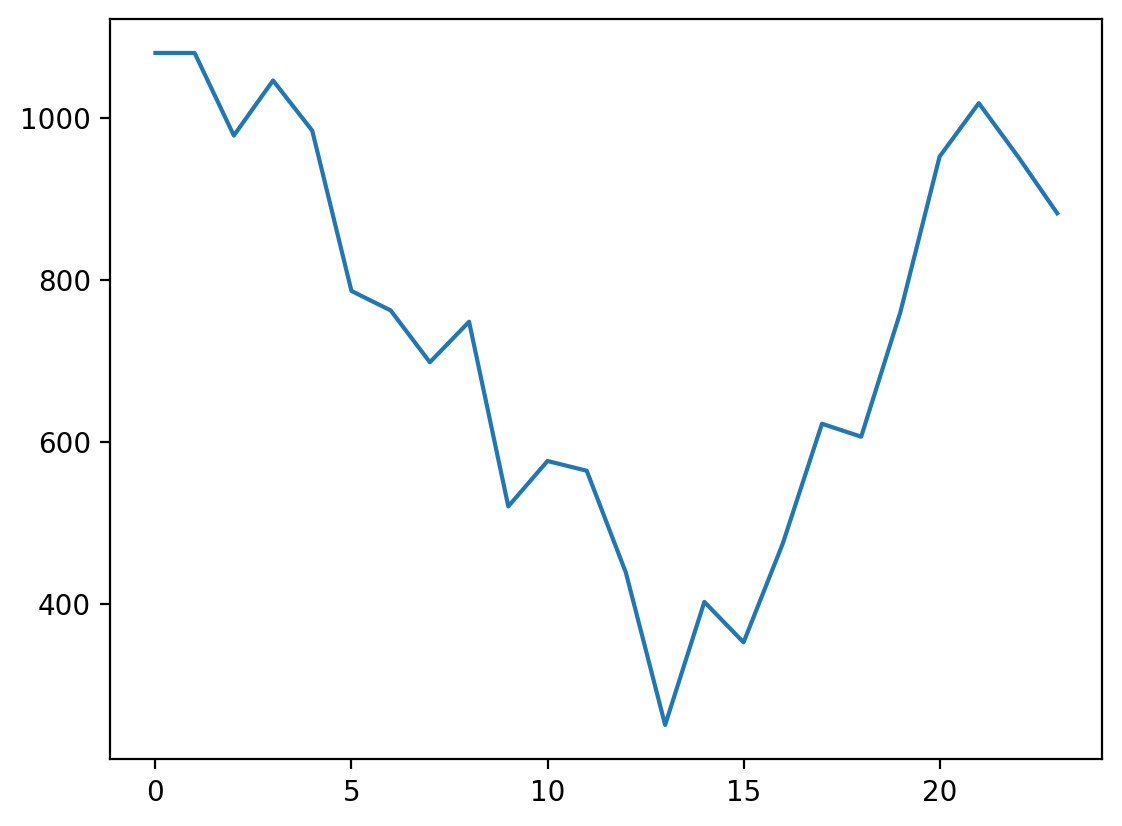

,0,1,2,3,4,5
0,1080.0,250.0,730.416667,830.0,244.606472,16549.0
1,918.0,-88.0,428.666667,1006.0,282.343565,9532.0
2,1372.0,192.0,559.916667,1180.0,298.098127,12895.0
3,1580.0,110.0,505.333333,1470.0,380.929419,11766.0
4,1254.0,146.0,452.000000,1108.0,315.475831,10613.0
...,...,...,...,...,...,...
360,406.0,-110.0,232.416667,516.0,156.731170,5236.0
361,742.0,40.0,326.916667,702.0,193.233002,7678.0
362,680.0,-390.0,216.916667,1070.0,232.018662,4979.0
363,394.0,-182.0,158.583333,576.0,187.118928,3555.0


In [239]:
data = np.array(pd.read_csv("./rsfmeasureddata2011.csv")["Building Net (kW)"])


# Split year into 365 day instances or "customers"
all_days = np.array_split(data, 365)
all_days[0][0] = all_days[0][1]


plt.plot(all_days[0])
plt.show()


# Functions to calculate attributes. These are just some examples we could change these.
def max_w(day):
    return np.max(day)


def min_w(day):
    return np.min(day)


def avg_w(day):
    return np.average(day)


def diff_w(day):
    return np.max(day) - np.min(day)


def std(day):
    return np.std(day)


def energy(day):
    return np.trapz(day)


attribute_array = []
for day in all_days:
    attribute_array = [
        *attribute_array,
        [
            max_w(day),
            min_w(day),
            avg_w(day),
            diff_w(day),
            std(day),
            energy(day),
        ],
    ]


pd.DataFrame(attribute_array)

In [240]:
df = pd.DataFrame(attribute_array)
df.to_csv("PartA.csv")

# Part B

[1 2 1 1 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 3 2 1 1 1 1 2 2 1
 1 1 1 1 2 2 3 2 2 3 3 2 3 3 2 2 2 2 2 3 2 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3
 3 3 3 0 0 3 3 3 3 3 0 0 3 3 3 3 3 0 3 2 3 3 3 3 0 3 2 2 2 2 3 3 3 3 3 2 3
 3 3 2 2 3 3 3 3 3 3 2 3 3 3 3 0 0 3 3 2 2 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 0
 0 0 3 3 3 3 0 0 3 3 3 3 3 0 0 3 0 0 0 0 0 3 3 3 0 0 3 3 0 3 3 3 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 3 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 3 0 0 0 0 0 0 3 3 3 0 0 0 0
 0 3 2 2 2 3 3 3 2 2 2 2 3 3 2 3 3 3 3 0 3 3 3 2 3 0 0 3 2 3 3 0 3 3 0 3 3
 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3]


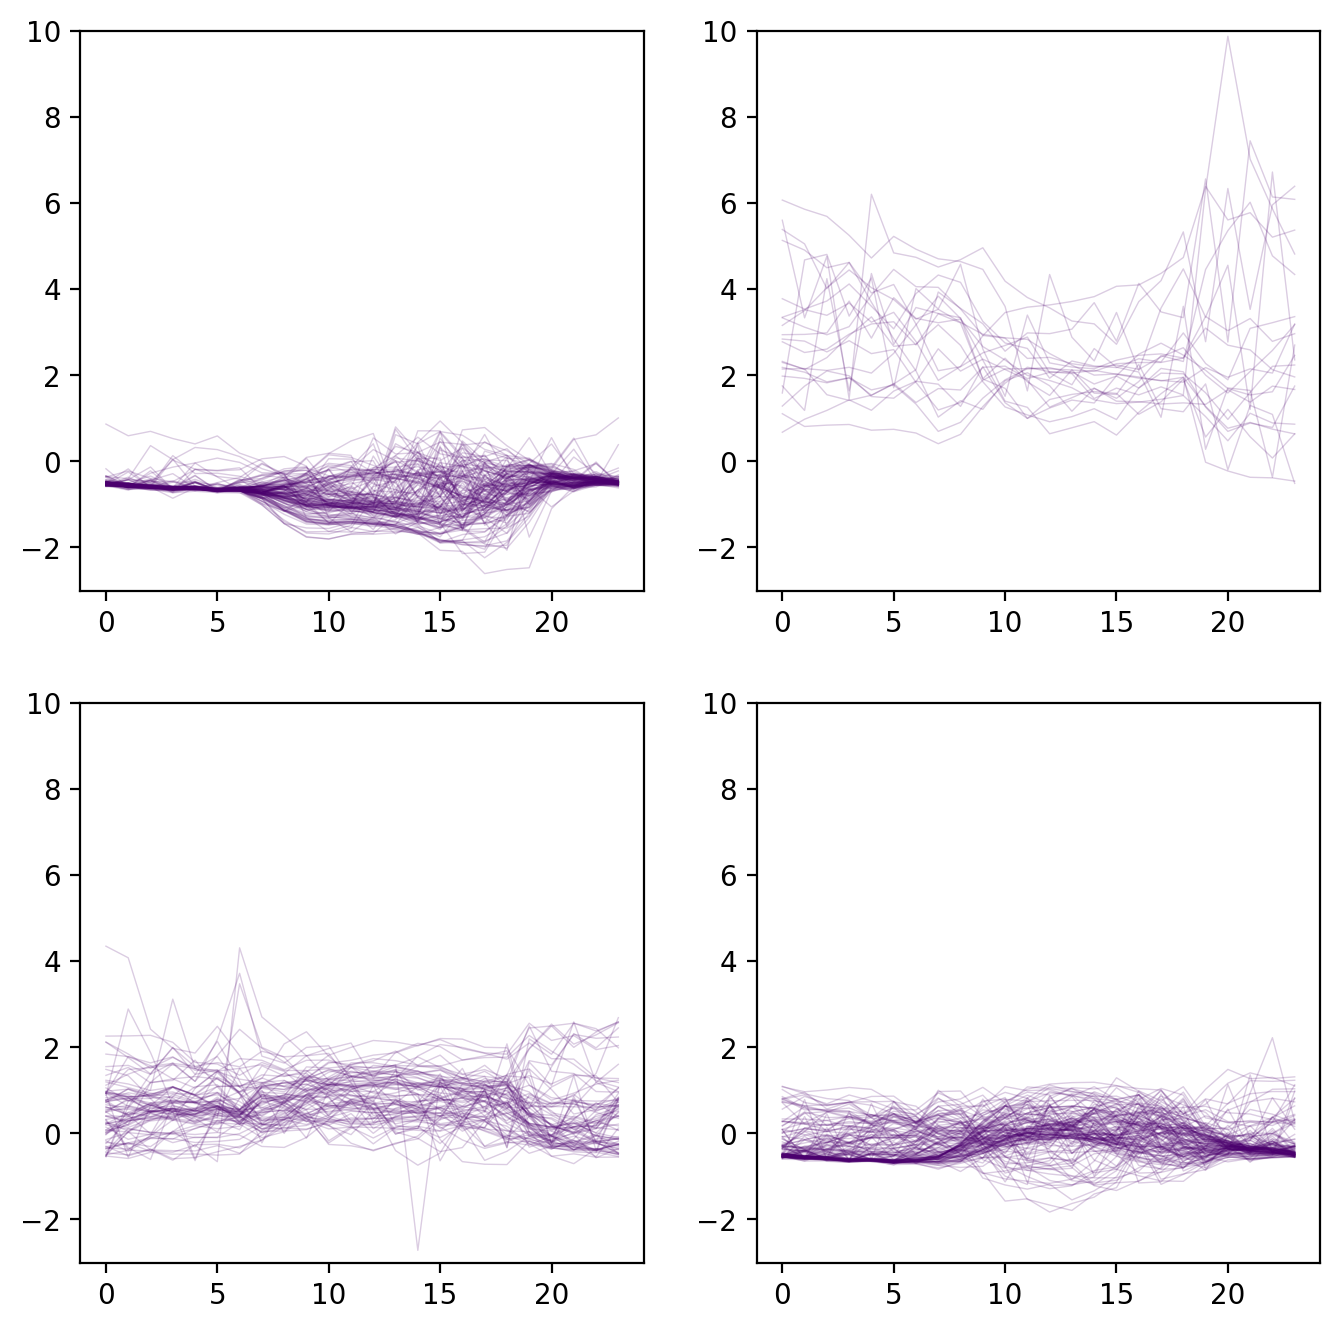

In [241]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
cluster_array = kmeans.fit_predict(attribute_array)
print(cluster_array)
# I'm not sure how to best visualize this
# How about like this

fig, axs = plt.subplots(int(math.ceil(n_clusters / 2)), 2, figsize=(8, 8))
axs = axs.flatten()

np_scaled = StandardScaler().fit_transform(all_days)



for idx,cluster_label in enumerate(cluster_array):
    np_profs = np_scaled[idx, :].T
    axs[cluster_label].plot()
    axs[cluster_label].plot(np_profs, alpha=0.2, linewidth=0.5, color="xkcd:royal purple")

for cluster_idx in set(cluster_array):
    axs[cluster_idx].set_ylim(-3, 10)

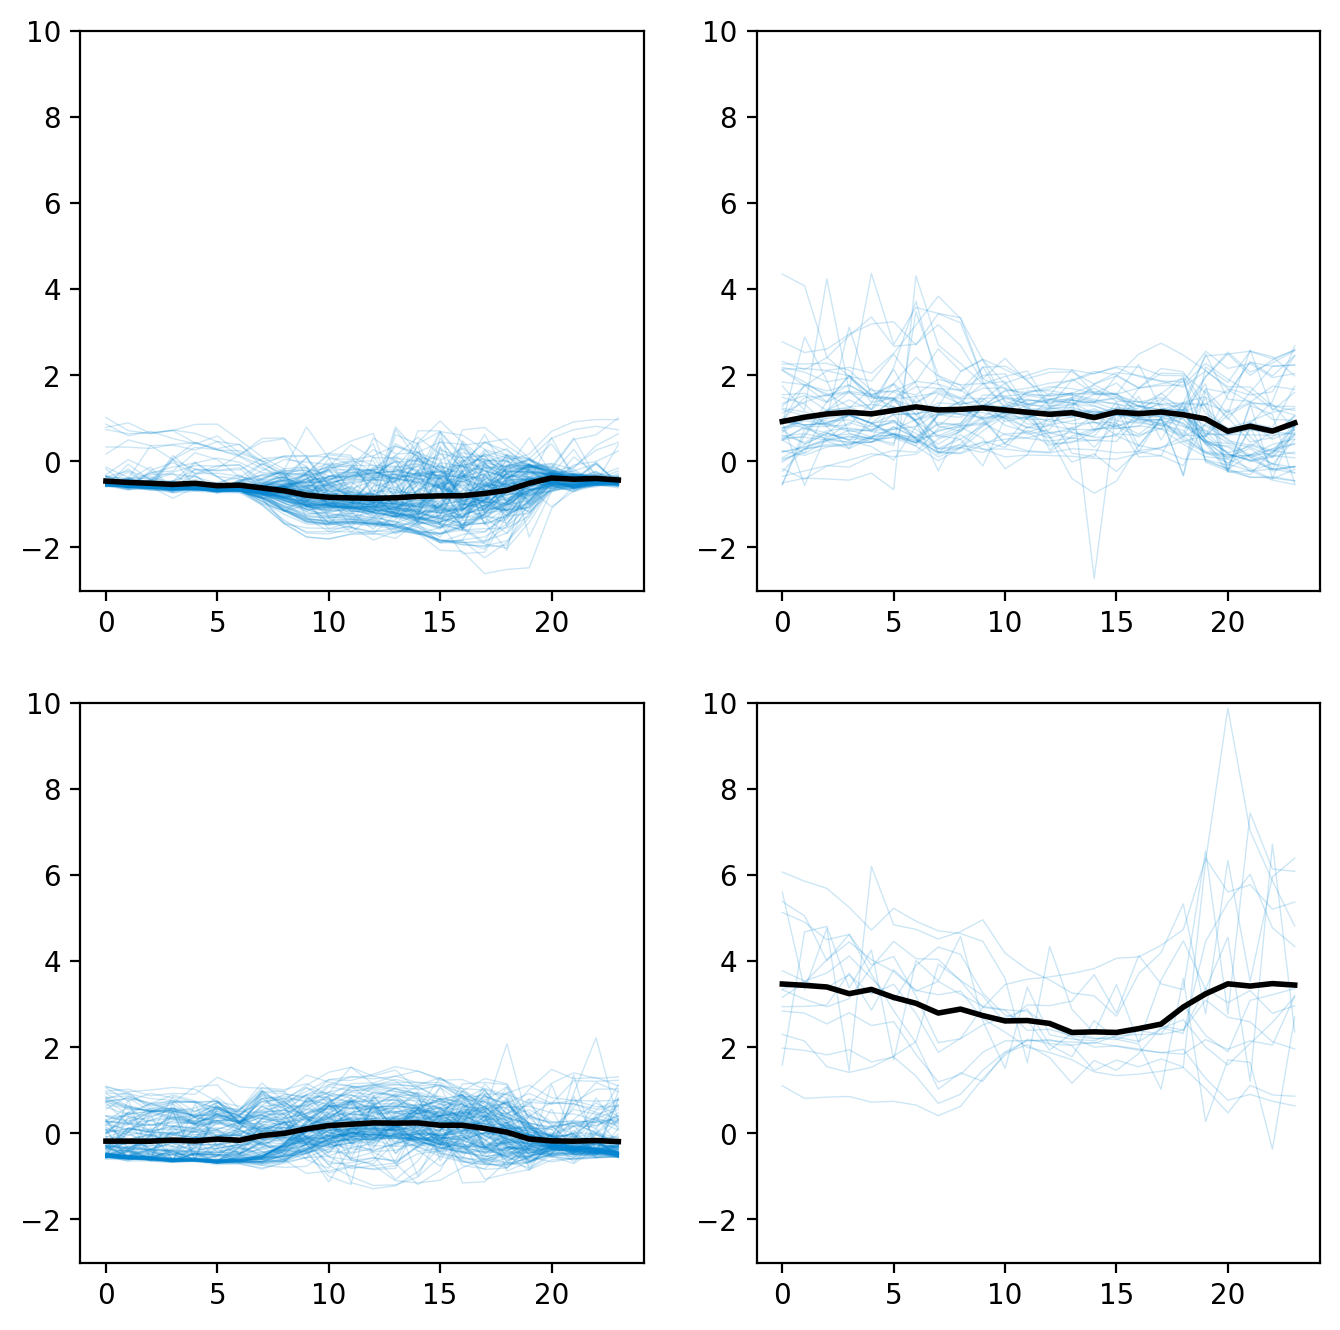

In [242]:
# This isn't actually what we've been asked to do but it might give us a better idea of number of clusters. Uses the whole time series of each day as opposed to the attributes


np_scaled = StandardScaler().fit_transform(all_days)


n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=100, n_init="auto")

df_preds = kmeans.fit_predict(np_scaled)

fig, ax = plt.subplots(int(math.ceil(n_clusters / 2)), 2, figsize=(8, 8))
ax = ax.flatten()

avgs = []
cluster_pop = []
for idx in np.unique(df_preds):
    indices = np.where(df_preds == idx)[0]

    cluster_pop.append(len(indices))
    np_profs = np_scaled[indices, :].T

    ax[idx].plot(np_profs, alpha=0.2, linewidth=0.5, color="xkcd:cerulean")

    ax[idx].plot(np.mean(np_profs, axis=1), color="black", linewidth=2)
    ax[idx].set_ylim(-3, 10)
    avgs.append(np.mean(np_profs, axis=1))

# Part C

Logistic Regression Classifier
	prediction [2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 3 3 1 3 2 1 1 2 2 2 3 2 3 3 0]
	actual     [2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3]
	score on train 0.7754491017964071
	score on test 0.5161290322580645
	0.5161290322580645

K Neighbors Classifer
	prediction [2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3]
	actual     [2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3]
	score on train 0.9940119760479041
	score on test 0.967741935483871

Linear Discriminant Analysis
	prediction [2 2 2 2 1 2 2 2 2 2 3 2 2 2 2 2 3 3 2 2 2 2 2 3 2 3 3 2 3 3 0]
	actual     [2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 3 3]
	score on train 0.8772455089820359
	score on test 0.8387096774193549


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'LDA')

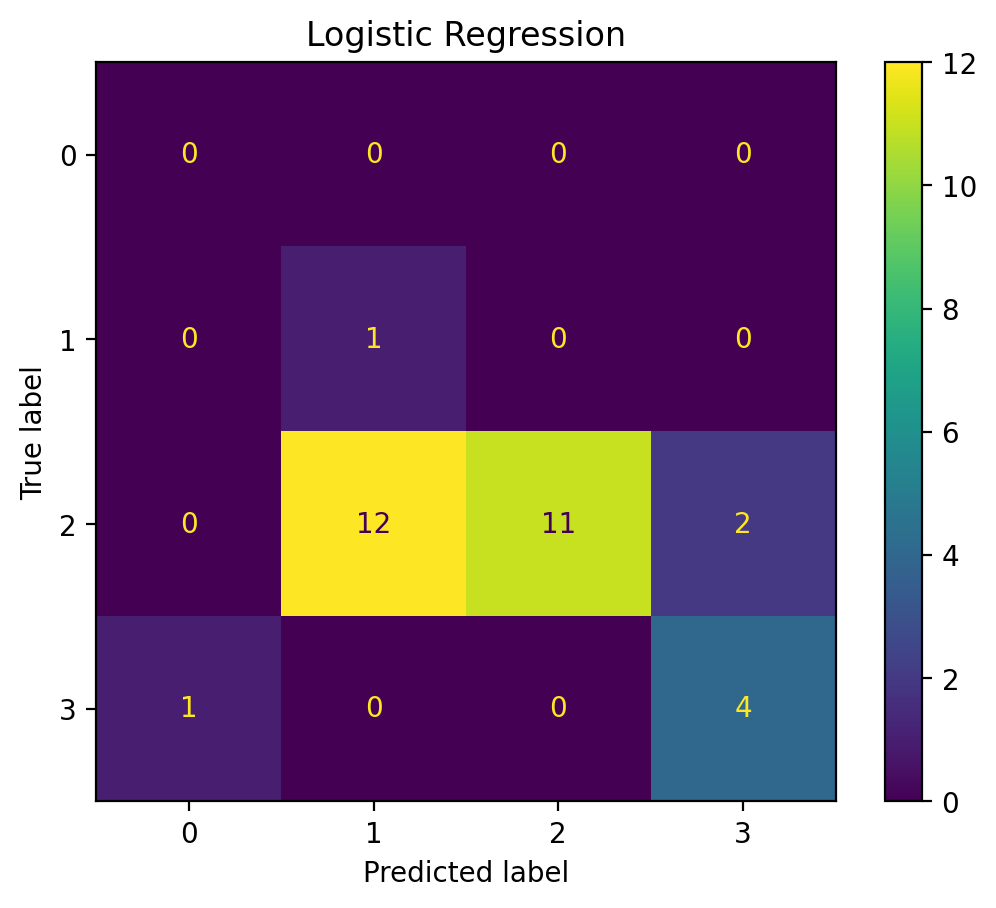

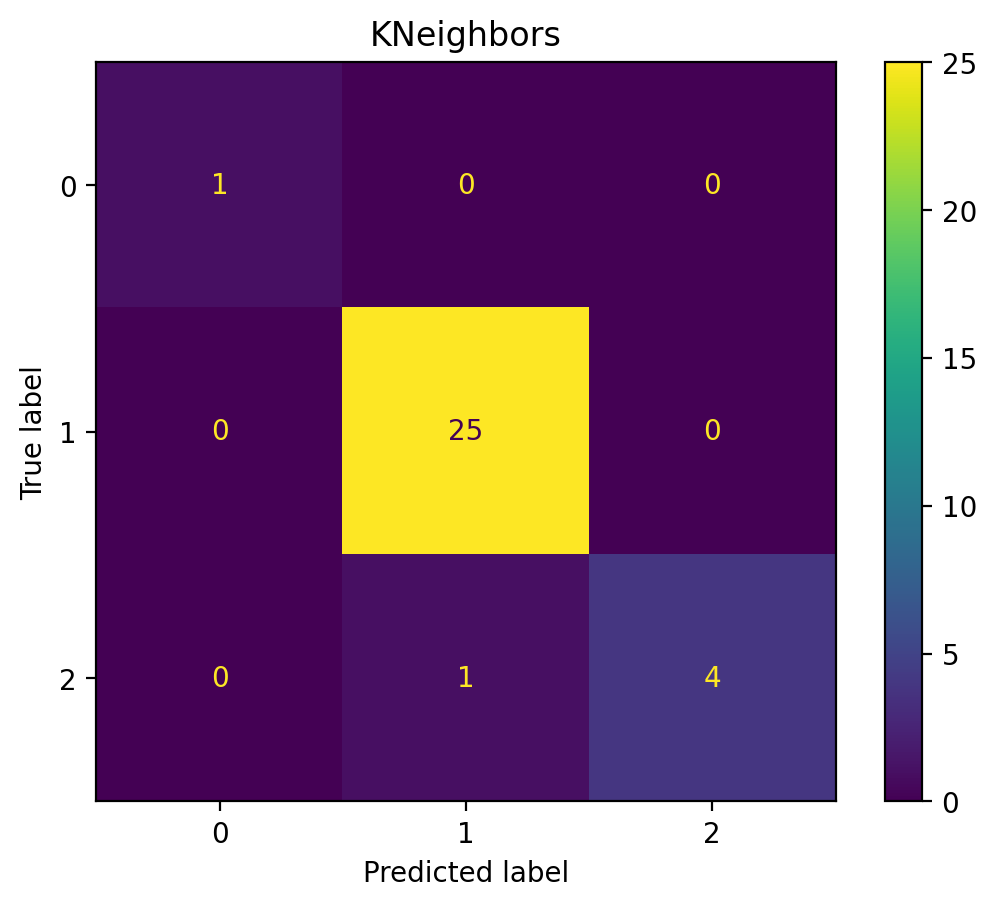

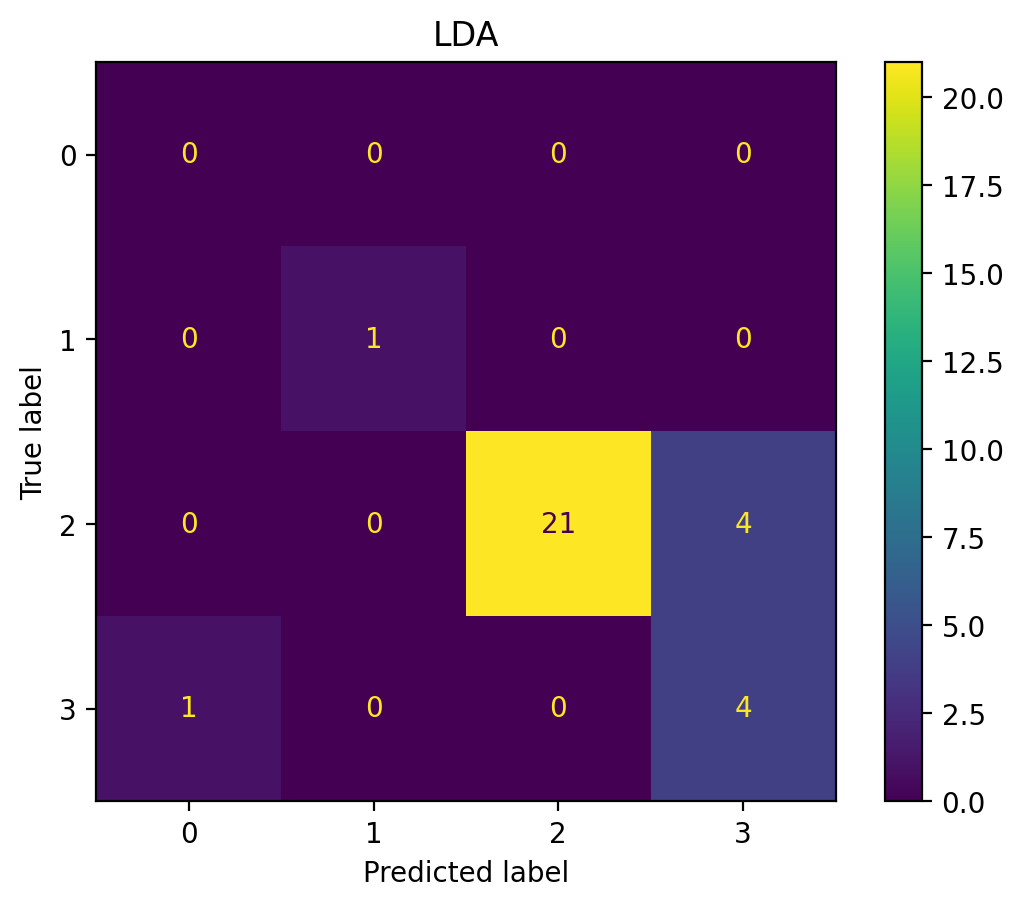

In [253]:
x_train = attribute_array[:334][:]
x_test = attribute_array[-31:][:]
y_train = cluster_array[:334]
y_test = cluster_array[-31:]


# Logistic regression classifier
print("Logistic Regression Classifier")
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)


prediction = lr.predict(x_test)
print("\tprediction", prediction)
print("\tactual    ", y_test)
print("\tscore on train", lr.score(x_train, y_train))
print("\tscore on test", lr.score(x_test, y_test))
print(f"\t{metrics.accuracy_score(y_test, prediction)}")  # same resullt as above line

confusion = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
ax = plt.gca()
ax.set_title("Logistic Regression")


# KNeighbors Classifier
print("\nK Neighbors Classifer")
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
prediction = neigh.predict(x_test)
print("\tprediction", prediction)
print("\tactual    ", y_test)
print("\tscore on train", neigh.score(x_train, y_train))
print("\tscore on test", neigh.score(x_test, y_test))

confusion = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
ax = plt.gca()
ax.set_title("KNeighbors")


print("\nLinear Discriminant Analysis")

lda_classifier = LinearDiscriminantAnalysis().fit(x_train, y_train)
lda_classifier.fit(x_train, y_train)
prediction = lda_classifier.predict(x_test)
print("\tprediction", prediction)
print("\tactual    ", y_test)
print("\tscore on train", lda_classifier.score(x_train, y_train))
print("\tscore on test", lda_classifier.score(x_test, y_test))

confusion = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()
ax = plt.gca()
ax.set_title("LDA")